In [1]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt


In [2]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x = np.concatenate([x_train, x_test], axis=0)

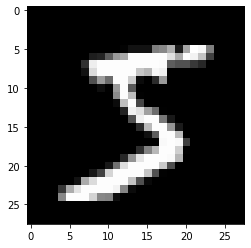

In [4]:
plt.figure()
plt.imshow(x[0], cmap='gray')
plt.show()

In [5]:
discriminator = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(64, 3, (2,2), input_shape=(28, 28, 1)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2D(128, 5, (2,2), input_shape=(28, 28, 1)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2D(256, 5, (2,2), input_shape=(28, 28, 1)),
     tf.keras.layers.LeakyReLU(),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

opt = tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 128)         204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 256)         8

In [6]:
generator = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(256, activation='relu', input_shape=(1,)),
     tf.keras.layers.Reshape((1, 1, 256)),
     
     tf.keras.layers.Conv2DTranspose(256, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(128, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu'),
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Conv2DTranspose(32, 5, activation='relu'),
     tf.keras.layers.BatchNormalization(),

     
     tf.keras.layers.Conv2DTranspose(1, 4, activation='sigmoid')
    
    ]
)

generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512       
_________________________________________________________________
reshape (Reshape)            (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 5, 5, 256)         1638656   
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 5, 256)         1024      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 9, 9, 128)         819328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 21, 21, 64)       

In [7]:
input_tensor = tf.keras.layers.Input(shape=(1,))
gen_out = generator(input_tensor)
disc_out = discriminator(gen_out)

gan = tf.keras.models.Model(input_tensor, disc_out)
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         2717025   
_________________________________________________________________
sequential (Sequential)      (None, 1)                 1027073   
Total params: 3,744,098
Trainable params: 2,716,065
Non-trainable params: 1,028,033
_________________________________________________________________


In [15]:
epochs = 25
batch_size=128
x_subset = x[0:6400]
steps_per_epoch = int(2 * x_subset.shape[0] / batch_size)


epoches: 0,   steps: 0
epoches: 0,   steps: 1
epoches: 0,   steps: 2
epoches: 0,   steps: 3
epoches: 0,   steps: 4
epoches: 0,   steps: 5
epoches: 0,   steps: 6
epoches: 0,   steps: 7
epoches: 0,   steps: 8
epoches: 0,   steps: 9
epoches: 0,   steps: 10
epoches: 0,   steps: 11
epoches: 0,   steps: 12
epoches: 0,   steps: 13
epoches: 0,   steps: 14
epoches: 0,   steps: 15
epoches: 0,   steps: 16
epoches: 0,   steps: 17
epoches: 0,   steps: 18
epoches: 0,   steps: 19
epoches: 0,   steps: 20
epoches: 0,   steps: 21
epoches: 0,   steps: 22
epoches: 0,   steps: 23
epoches: 0,   steps: 24
epoches: 0,   steps: 25
epoches: 0,   steps: 26
epoches: 0,   steps: 27
epoches: 0,   steps: 28
epoches: 0,   steps: 29
epoches: 0,   steps: 30
epoches: 0,   steps: 31
epoches: 0,   steps: 32
epoches: 0,   steps: 33
epoches: 0,   steps: 34
epoches: 0,   steps: 35
epoches: 0,   steps: 36
epoches: 0,   steps: 37
epoches: 0,   steps: 38
epoches: 0,   steps: 39
epoches: 0,   steps: 40
epoches: 0,   steps: 41
ep

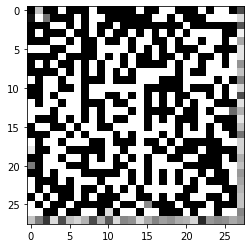

epoches: 1,   steps: 0
epoches: 1,   steps: 1
epoches: 1,   steps: 2
epoches: 1,   steps: 3
epoches: 1,   steps: 4
epoches: 1,   steps: 5
epoches: 1,   steps: 6
epoches: 1,   steps: 7
epoches: 1,   steps: 8
epoches: 1,   steps: 9
epoches: 1,   steps: 10
epoches: 1,   steps: 11
epoches: 1,   steps: 12
epoches: 1,   steps: 13
epoches: 1,   steps: 14
epoches: 1,   steps: 15
epoches: 1,   steps: 16
epoches: 1,   steps: 17
epoches: 1,   steps: 18
epoches: 1,   steps: 19
epoches: 1,   steps: 20
epoches: 1,   steps: 21
epoches: 1,   steps: 22
epoches: 1,   steps: 23
epoches: 1,   steps: 24
epoches: 1,   steps: 25
epoches: 1,   steps: 26
epoches: 1,   steps: 27
epoches: 1,   steps: 28
epoches: 1,   steps: 29
epoches: 1,   steps: 30
epoches: 1,   steps: 31
epoches: 1,   steps: 32
epoches: 1,   steps: 33
epoches: 1,   steps: 34
epoches: 1,   steps: 35
epoches: 1,   steps: 36
epoches: 1,   steps: 37
epoches: 1,   steps: 38
epoches: 1,   steps: 39
epoches: 1,   steps: 40
epoches: 1,   steps: 41
ep

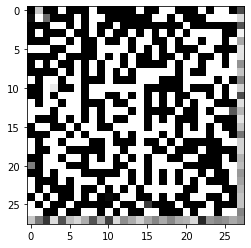

epoches: 2,   steps: 0
epoches: 2,   steps: 1
epoches: 2,   steps: 2
epoches: 2,   steps: 3
epoches: 2,   steps: 4
epoches: 2,   steps: 5
epoches: 2,   steps: 6
epoches: 2,   steps: 7
epoches: 2,   steps: 8
epoches: 2,   steps: 9
epoches: 2,   steps: 10
epoches: 2,   steps: 11
epoches: 2,   steps: 12
epoches: 2,   steps: 13
epoches: 2,   steps: 14
epoches: 2,   steps: 15
epoches: 2,   steps: 16
epoches: 2,   steps: 17
epoches: 2,   steps: 18
epoches: 2,   steps: 19
epoches: 2,   steps: 20
epoches: 2,   steps: 21
epoches: 2,   steps: 22
epoches: 2,   steps: 23
epoches: 2,   steps: 24
epoches: 2,   steps: 25
epoches: 2,   steps: 26
epoches: 2,   steps: 27
epoches: 2,   steps: 28
epoches: 2,   steps: 29
epoches: 2,   steps: 30
epoches: 2,   steps: 31
epoches: 2,   steps: 32
epoches: 2,   steps: 33
epoches: 2,   steps: 34
epoches: 2,   steps: 35
epoches: 2,   steps: 36
epoches: 2,   steps: 37
epoches: 2,   steps: 38
epoches: 2,   steps: 39
epoches: 2,   steps: 40
epoches: 2,   steps: 41
ep

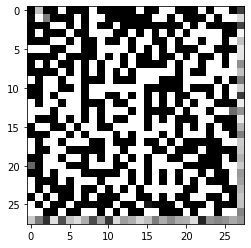

epoches: 3,   steps: 0
epoches: 3,   steps: 1
epoches: 3,   steps: 2
epoches: 3,   steps: 3
epoches: 3,   steps: 4
epoches: 3,   steps: 5
epoches: 3,   steps: 6
epoches: 3,   steps: 7
epoches: 3,   steps: 8
epoches: 3,   steps: 9
epoches: 3,   steps: 10
epoches: 3,   steps: 11
epoches: 3,   steps: 12
epoches: 3,   steps: 13
epoches: 3,   steps: 14
epoches: 3,   steps: 15
epoches: 3,   steps: 16
epoches: 3,   steps: 17
epoches: 3,   steps: 18
epoches: 3,   steps: 19
epoches: 3,   steps: 20
epoches: 3,   steps: 21
epoches: 3,   steps: 22
epoches: 3,   steps: 23
epoches: 3,   steps: 24
epoches: 3,   steps: 25
epoches: 3,   steps: 26
epoches: 3,   steps: 27
epoches: 3,   steps: 28
epoches: 3,   steps: 29
epoches: 3,   steps: 30
epoches: 3,   steps: 31
epoches: 3,   steps: 32
epoches: 3,   steps: 33
epoches: 3,   steps: 34
epoches: 3,   steps: 35
epoches: 3,   steps: 36
epoches: 3,   steps: 37
epoches: 3,   steps: 38
epoches: 3,   steps: 39
epoches: 3,   steps: 40
epoches: 3,   steps: 41
ep

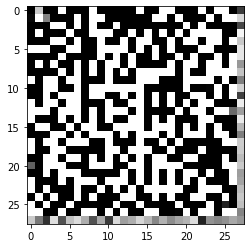

epoches: 4,   steps: 0
epoches: 4,   steps: 1
epoches: 4,   steps: 2
epoches: 4,   steps: 3
epoches: 4,   steps: 4
epoches: 4,   steps: 5
epoches: 4,   steps: 6
epoches: 4,   steps: 7
epoches: 4,   steps: 8
epoches: 4,   steps: 9
epoches: 4,   steps: 10
epoches: 4,   steps: 11
epoches: 4,   steps: 12
epoches: 4,   steps: 13
epoches: 4,   steps: 14
epoches: 4,   steps: 15
epoches: 4,   steps: 16
epoches: 4,   steps: 17
epoches: 4,   steps: 18
epoches: 4,   steps: 19
epoches: 4,   steps: 20
epoches: 4,   steps: 21
epoches: 4,   steps: 22
epoches: 4,   steps: 23
epoches: 4,   steps: 24
epoches: 4,   steps: 25
epoches: 4,   steps: 26
epoches: 4,   steps: 27
epoches: 4,   steps: 28
epoches: 4,   steps: 29
epoches: 4,   steps: 30
epoches: 4,   steps: 31
epoches: 4,   steps: 32
epoches: 4,   steps: 33
epoches: 4,   steps: 34
epoches: 4,   steps: 35
epoches: 4,   steps: 36
epoches: 4,   steps: 37
epoches: 4,   steps: 38
epoches: 4,   steps: 39
epoches: 4,   steps: 40
epoches: 4,   steps: 41
ep

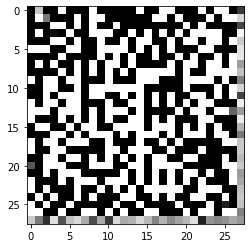

epoches: 5,   steps: 0
epoches: 5,   steps: 1
epoches: 5,   steps: 2
epoches: 5,   steps: 3
epoches: 5,   steps: 4
epoches: 5,   steps: 5
epoches: 5,   steps: 6
epoches: 5,   steps: 7
epoches: 5,   steps: 8
epoches: 5,   steps: 9
epoches: 5,   steps: 10
epoches: 5,   steps: 11
epoches: 5,   steps: 12
epoches: 5,   steps: 13
epoches: 5,   steps: 14
epoches: 5,   steps: 15
epoches: 5,   steps: 16
epoches: 5,   steps: 17
epoches: 5,   steps: 18
epoches: 5,   steps: 19
epoches: 5,   steps: 20
epoches: 5,   steps: 21
epoches: 5,   steps: 22
epoches: 5,   steps: 23
epoches: 5,   steps: 24
epoches: 5,   steps: 25
epoches: 5,   steps: 26
epoches: 5,   steps: 27
epoches: 5,   steps: 28
epoches: 5,   steps: 29
epoches: 5,   steps: 30
epoches: 5,   steps: 31
epoches: 5,   steps: 32
epoches: 5,   steps: 33
epoches: 5,   steps: 34
epoches: 5,   steps: 35
epoches: 5,   steps: 36
epoches: 5,   steps: 37
epoches: 5,   steps: 38
epoches: 5,   steps: 39
epoches: 5,   steps: 40
epoches: 5,   steps: 41
ep

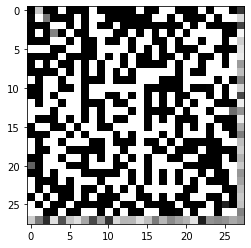

epoches: 6,   steps: 0
epoches: 6,   steps: 1
epoches: 6,   steps: 2
epoches: 6,   steps: 3
epoches: 6,   steps: 4
epoches: 6,   steps: 5
epoches: 6,   steps: 6
epoches: 6,   steps: 7
epoches: 6,   steps: 8
epoches: 6,   steps: 9
epoches: 6,   steps: 10
epoches: 6,   steps: 11
epoches: 6,   steps: 12
epoches: 6,   steps: 13
epoches: 6,   steps: 14
epoches: 6,   steps: 15
epoches: 6,   steps: 16
epoches: 6,   steps: 17
epoches: 6,   steps: 18
epoches: 6,   steps: 19
epoches: 6,   steps: 20
epoches: 6,   steps: 21
epoches: 6,   steps: 22
epoches: 6,   steps: 23
epoches: 6,   steps: 24
epoches: 6,   steps: 25
epoches: 6,   steps: 26
epoches: 6,   steps: 27
epoches: 6,   steps: 28
epoches: 6,   steps: 29
epoches: 6,   steps: 30
epoches: 6,   steps: 31
epoches: 6,   steps: 32
epoches: 6,   steps: 33
epoches: 6,   steps: 34
epoches: 6,   steps: 35
epoches: 6,   steps: 36
epoches: 6,   steps: 37
epoches: 6,   steps: 38
epoches: 6,   steps: 39
epoches: 6,   steps: 40
epoches: 6,   steps: 41
ep

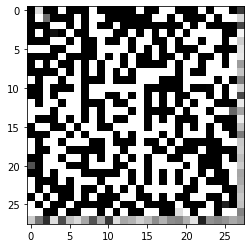

epoches: 7,   steps: 0
epoches: 7,   steps: 1
epoches: 7,   steps: 2
epoches: 7,   steps: 3
epoches: 7,   steps: 4
epoches: 7,   steps: 5
epoches: 7,   steps: 6
epoches: 7,   steps: 7
epoches: 7,   steps: 8
epoches: 7,   steps: 9
epoches: 7,   steps: 10
epoches: 7,   steps: 11
epoches: 7,   steps: 12
epoches: 7,   steps: 13
epoches: 7,   steps: 14
epoches: 7,   steps: 15
epoches: 7,   steps: 16
epoches: 7,   steps: 17
epoches: 7,   steps: 18
epoches: 7,   steps: 19
epoches: 7,   steps: 20
epoches: 7,   steps: 21
epoches: 7,   steps: 22
epoches: 7,   steps: 23
epoches: 7,   steps: 24
epoches: 7,   steps: 25
epoches: 7,   steps: 26
epoches: 7,   steps: 27
epoches: 7,   steps: 28
epoches: 7,   steps: 29
epoches: 7,   steps: 30
epoches: 7,   steps: 31
epoches: 7,   steps: 32
epoches: 7,   steps: 33
epoches: 7,   steps: 34
epoches: 7,   steps: 35
epoches: 7,   steps: 36
epoches: 7,   steps: 37
epoches: 7,   steps: 38
epoches: 7,   steps: 39
epoches: 7,   steps: 40
epoches: 7,   steps: 41
ep

KeyboardInterrupt: ignored

In [16]:
for e in range(epochs):
  for step in range(steps_per_epoch):
    print(f'epoches: {e},   steps: {step}')
    true_examples = x_subset[int(batch_size/2*step):int(batch_size/2*(step+1))]
    true_examples = np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

    noise = np.random.randn(int(batch_size/2), 1)
    fake_examples = generator.predict(noise)

    x_batch = np.concatenate([fake_examples, true_examples], axis=0)
    y_batch = np.array([0]*int(batch_size/2) + [1]*int(batch_size/2))

    indices = np.random.choice(range(batch_size), batch_size, replace=False)

    x_batch = x_batch[indices]
    y_batch = y_batch[indices]

    discriminator.trainable = True
    discriminator.train_on_batch(x_batch, y_batch)
    discriminator.trainable = False

    gan.train_on_batch(noise, np.ones((int(batch_size /2),1)))

  noise = np.random.randn(1, 1)
  gen = generator.predict(noise)[0]
  gen = np.reshape(gen, (28, 28))

  plt.figure()
  plt.imshow(gen, cmap='gray')
  plt.show()

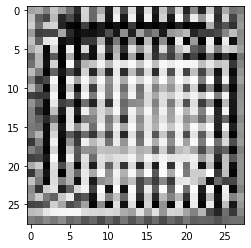